In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df = pd.read_csv(r'C:\Users\OMEN\Recommendation System\Dataset\movie_metadata.csv')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

<Figure size 1440x1440 with 0 Axes>

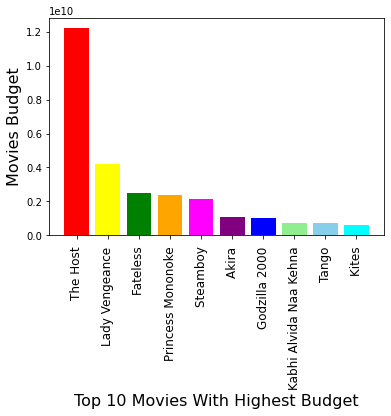

In [5]:
plt.figure(figsize = (20,20))
budgets = df.sort_values('budget', ascending = False)
fig, ax = plt.subplots()
highest_budgets = ax.bar(budgets['movie_title'].head(10), budgets['budget'].head(10), color= ['red','yellow','green','orange','magenta','purple','blue','lightgreen','skyblue','cyan'])
plt.ylabel('Movies Budget', fontsize = 16)
plt.xlabel('Top 10 Movies With Highest Budget', fontsize = 16)
plt.xticks(fontsize = 12, rotation = 90)
plt.show()

In [6]:
df = df.loc[:, ['movie_title', 'genres', 'director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name']]
df.head()

,movie_title,genres,director_name,actor_1_name,actor_2_name,actor_3_name
0,Avatar,Action|Adventure|Fantasy|Sci-Fi,James Cameron,CCH Pounder,Joel David Moore,Wes Studi
1,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport
2,Spectre,Action|Adventure|Thriller,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman
3,The Dark Knight Rises,Action|Thriller,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt
4,Star Wars: Episode VII - The Force Awakens ...,Documentary,Doug Walker,Doug Walker,Rob Walker,NaN


In [7]:
df['director_name'] = df.director_name.replace(np.nan, 'Unknown')
df['actor_1_name'] = df.actor_1_name.replace(np.nan, 'Unknown')
df['actor_2_name'] = df.actor_2_name.replace(np.nan, 'Unknown')
df['actor_3_name'] = df.actor_3_name.replace(np.nan, 'Unknown')

In [8]:
df['genres'] = df['genres'].replace('|', '  ')

In [9]:
df.movie_title = df.movie_title.str.lower()

In [10]:
df.movie_title[0]

'avatar\xa0'

In [11]:
df.movie_title = df.movie_title.apply(lambda x : x[:-1])

In [12]:
df.movie_title[0]

'avatar'

In [13]:
genres = []
for genre in df.genres:
    x = genre.split(',')
    for i in x:
        if i not in genres:
            genres.append(str(i))
genres = str(genres)

In [14]:
genre_wordcloud = WordCloud(width = 1600, height = 1600,background_color = None, mode = 'RGBA', min_font_size = 2, min_word_length = 3).generate(genres)


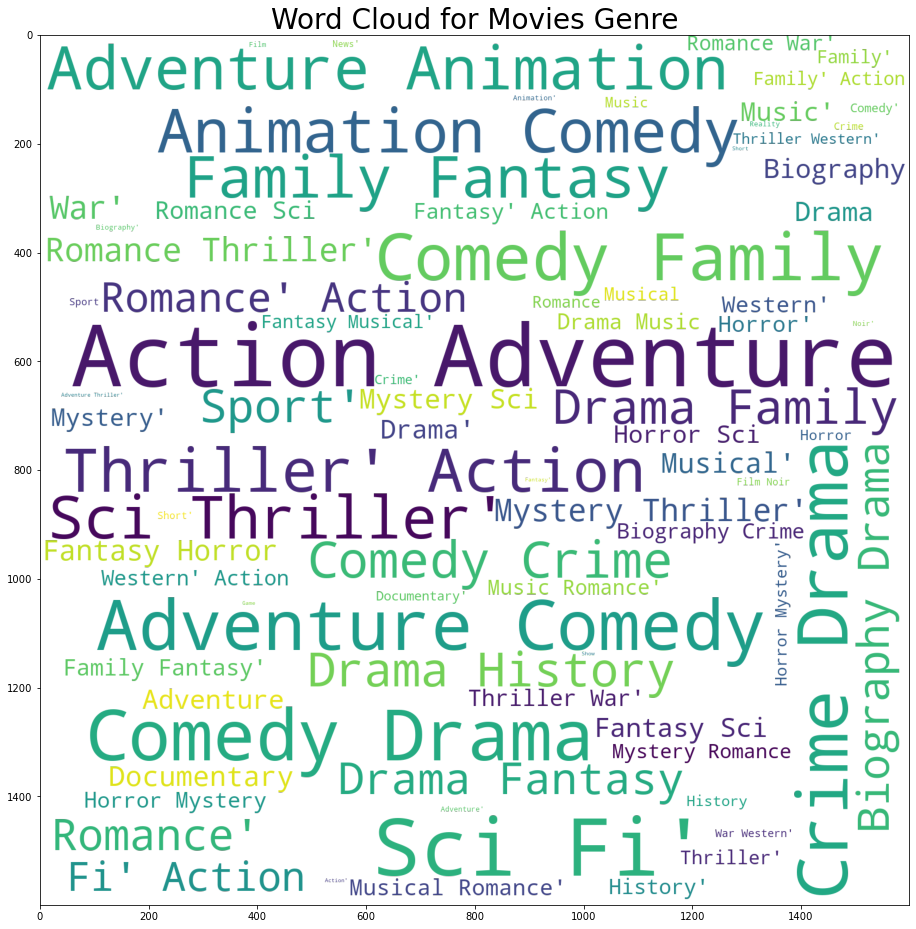

In [15]:
plt.figure(figsize = (20, 16))
plt.title('Word Cloud for Movies Genre', fontsize = 28)
plt.imshow(genre_wordcloud)

In [16]:
movie_title = []
for title in df.movie_title:
    movie_title.append(title)
movie_title = str(movie_title)  

In [17]:
title_wordcloud = WordCloud(width = 1600, height = 1600, mode = 'RGBA', min_font_size = 2, min_word_length = 3).generate(movie_title)

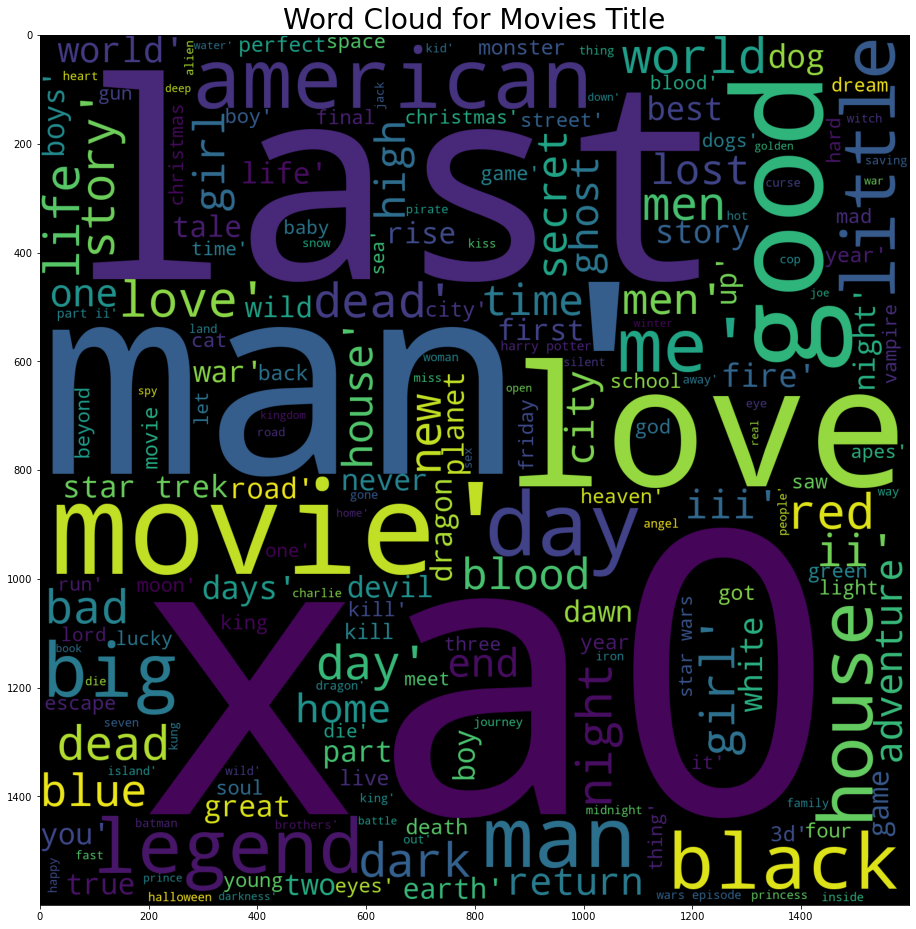

In [18]:
plt.figure(figsize = (20, 16))
plt.title('Word Cloud for Movies Title', fontsize = 28)
plt.imshow(title_wordcloud)

In [24]:
df.to_csv('cleaned_movie_metadata.csv', index = False)

## Preprocessing 2

In [19]:
df1 = pd.read_csv(r'C:\Users\OMEN\Recommendation System\Dataset\credits.csv')
df1.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [20]:
df1.dtypes

cast    object
crew    object
id       int64
dtype: object

In [21]:
df2 = pd.read_csv(r'C:\Users\OMEN\Recommendation System\Dataset\movies_metadata.csv')
df2.head()

C:\Users\OMEN\anaconda3\envs\recommendation_system\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [22]:
df2['release_date'] = pd.to_datetime(df2.release_date, errors = 'coerce')

In [23]:
df2['year'] = df2.release_date.dt.year

In [24]:
df2['year'].value_counts().sort_index()

1874.0       1
1878.0       1
1883.0       1
1887.0       1
1888.0       2
          ... 
2015.0    1905
2016.0    1604
2017.0     532
2018.0       5
2020.0       1
Name: year, Length: 135, dtype: int64

In [25]:
year_2017 = df2.loc[df2.year == 2017, ['genres', 'id', 'title', 'year']]
year_2017

,genres,id,title,year
26560,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0
26561,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",141052,Justice League,2017.0
26565,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",284053,Thor: Ragnarok,2017.0
26566,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",283995,Guardians of the Galaxy Vol. 2,2017.0
30536,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",245842,The King's Daughter,2017.0
...,...,...,...,...
45398,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",468707,Thick Lashes of Lauri Mäntyvaara,2017.0
45417,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",461297,Cop and a Half: New Recruit,2017.0
45437,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",455661,In a Heartbeat,2017.0
45453,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",404604,Mom,2017.0


In [26]:
year_2017['id'] = year_2017.id.astype('int64')

In [27]:
year_2017.dtypes

genres     object
id          int64
title      object
year      float64
dtype: object

In [28]:
# mearging movies meta data and credits dataframe
data = pd.merge(year_2017, df1, on = 'id')

In [29]:
data.head()

,genres,id,title,year,cast,crew
0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0,"[{'cast_id': 1, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4c9cc3a36847f8236a65', 'de..."
1,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",141052,Justice League,2017.0,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '55ef66dbc3a3686f1700a52d', 'de..."
2,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",284053,Thor: Ragnarok,2017.0,"[{'cast_id': 0, 'character': 'Thor Odinson', '...","[{'credit_id': '56a93fa4c3a36872db001e7a', 'de..."
3,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",283995,Guardians of the Galaxy Vol. 2,2017.0,"[{'cast_id': 3, 'character': 'Peter Quill / St...","[{'credit_id': '59171547925141583c0315a6', 'de..."
4,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",245842,The King's Daughter,2017.0,"[{'cast_id': 0, 'character': 'King Louis XIV',...","[{'credit_id': '5431de49c3a36825d300007e', 'de..."


In [30]:
#converting dictionaries into lists
import ast
data['genres'] = data.genres.map(lambda x: ast.literal_eval(x))
data['cast'] = data.cast.map(lambda x: ast.literal_eval(x))
data['crew'] = data.crew.map(lambda x: ast.literal_eval(x))

In [31]:
def genre_list(x):
    genre = []
    st = " "
    for i in x:
        if i.get('name') == 'Science Fiction':
            scifi = 'Sci-Fi'
            genre.append(scifi)
        else:
            genre.append(i.get('name'))
    if genre == []:
        return np.NaN
    else:
        return (st.join(genre))

In [32]:
data['genres_list'] = data.genres.map(lambda x: genre_list(x))

In [33]:
data['genres_list']

0      Adventure Action Fantasy Comedy
1      Action Adventure Fantasy Sci-Fi
2      Action Adventure Fantasy Sci-Fi
3       Action Adventure Comedy Sci-Fi
4             Fantasy Action Adventure
                    ...               
526                     Romance Comedy
527         Crime Comedy Action Family
528    Family Animation Romance Comedy
529               Crime Drama Thriller
530                                NaN
Name: genres_list, Length: 531, dtype: object

In [34]:
def get_actor_1(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == []:
        return np.NaN
    else:
        return (casts[0])

In [35]:
data['actor_1_name'] = data.cast.map(lambda x: get_actor_1(x))

In [36]:
data['actor_1_name']

0               Johnny Depp
1               Ben Affleck
2           Chris Hemsworth
3               Chris Pratt
4            Pierce Brosnan
               ...         
526          Inka Haapamäki
527    Lou Diamond Phillips
528                     NaN
529          Sridevi Kapoor
530                     NaN
Name: actor_1_name, Length: 531, dtype: object

In [37]:
def get_actor_2(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == [] or len(casts) <= 1:
        return np.NaN
    else:
        return (casts[1])

In [38]:
data['actor_2_name'] = data.cast.map(lambda x: get_actor_2(x))

In [39]:
data['actor_2_name']

0       Javier Bardem
1        Henry Cavill
2      Tom Hiddleston
3         Zoe Saldana
4        William Hurt
            ...      
526     Rosa Honkonen
527     Wallace Shawn
528               NaN
529         Sajal Ali
530               NaN
Name: actor_2_name, Length: 531, dtype: object

In [40]:
def get_actor_3(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == [] or len(casts) <= 2:
        return np.NaN
    else:
        return (casts[2])

In [41]:
data['actor_3_name'] = data.cast.map(lambda x: get_actor_3(x))

In [42]:
data['actor_3_name']

0        Geoffrey Rush
1            Gal Gadot
2       Cate Blanchett
3        Dave Bautista
4      Benjamin Walker
            ...       
526     Tiitus Rantala
527        Gina Holden
528                NaN
529     Akshaye Khanna
530                NaN
Name: actor_3_name, Length: 531, dtype: object

In [43]:
def get_director(x):
    dt = []
    st = " "
    for i in x:
        if i.get('job') == 'Director':
            dt.append(i.get('name'))
    if dt == []:
        return np.NaN
    else:
        return (st.join(dt))

In [44]:
data['director_name'] = data.crew.map(lambda x: get_director(x))

In [45]:
data['director_name']

0      Joachim Rønning Espen Sandberg
1                         Zack Snyder
2                       Taika Waititi
3                          James Gunn
4                       Sean McNamara
                    ...              
526                  Hannaleena Hauru
527             Jonathan A. Rosenbaum
528          Beth David Esteban Bravo
529                      Ravi Udyawar
530                     Daisy Asquith
Name: director_name, Length: 531, dtype: object

In [46]:
final_df = data.loc[:, ['title', 'genres_list', 'director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name']]
final_df

,title,genres_list,director_name,actor_1_name,actor_2_name,actor_3_name
0,Pirates of the Caribbean: Dead Men Tell No Tales,Adventure Action Fantasy Comedy,Joachim Rønning Espen Sandberg,Johnny Depp,Javier Bardem,Geoffrey Rush
1,Justice League,Action Adventure Fantasy Sci-Fi,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot
2,Thor: Ragnarok,Action Adventure Fantasy Sci-Fi,Taika Waititi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett
3,Guardians of the Galaxy Vol. 2,Action Adventure Comedy Sci-Fi,James Gunn,Chris Pratt,Zoe Saldana,Dave Bautista
4,The King's Daughter,Fantasy Action Adventure,Sean McNamara,Pierce Brosnan,William Hurt,Benjamin Walker
...,...,...,...,...,...,...
526,Thick Lashes of Lauri Mäntyvaara,Romance Comedy,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala
527,Cop and a Half: New Recruit,Crime Comedy Action Family,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden
528,In a Heartbeat,Family Animation Romance Comedy,Beth David Esteban Bravo,NaN,NaN,NaN
529,Mom,Crime Drama Thriller,Ravi Udyawar,Sridevi Kapoor,Sajal Ali,Akshaye Khanna


In [47]:
final_df.isnull().sum()

title             0
genres_list       7
director_name     4
actor_1_name     22
actor_2_name     55
actor_3_name     70
dtype: int64

In [48]:
final_df = final_df.dropna(how = 'any')

In [49]:
final_df = final_df.rename(columns = {'genres_list': 'genres'})
final_df = final_df.rename(columns = {'title': 'movie_title'})

In [50]:
final_df.movie_title = final_df.movie_title.str.lower()

In [51]:
final_df['combined_data'] = final_df['genres'] + " " + final_df['director_name'] + " " +  final_df['actor_1_name'] + " " + final_df['actor_2_name'] + " " + final_df['actor_3_name'] 

In [52]:
final_df

,movie_title,genres,director_name,actor_1_name,actor_2_name,actor_3_name,combined_data
0,pirates of the caribbean: dead men tell no tales,Adventure Action Fantasy Comedy,Joachim Rønning Espen Sandberg,Johnny Depp,Javier Bardem,Geoffrey Rush,Adventure Action Fantasy Comedy Joachim Rønnin...
1,justice league,Action Adventure Fantasy Sci-Fi,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot,Action Adventure Fantasy Sci-Fi Zack Snyder Be...
2,thor: ragnarok,Action Adventure Fantasy Sci-Fi,Taika Waititi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Action Adventure Fantasy Sci-Fi Taika Waititi ...
3,guardians of the galaxy vol. 2,Action Adventure Comedy Sci-Fi,James Gunn,Chris Pratt,Zoe Saldana,Dave Bautista,Action Adventure Comedy Sci-Fi James Gunn Chri...
4,the king's daughter,Fantasy Action Adventure,Sean McNamara,Pierce Brosnan,William Hurt,Benjamin Walker,Fantasy Action Adventure Sean McNamara Pierce ...
...,...,...,...,...,...,...,...
524,the incredible jessica james,Romance Comedy,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy Jim Strouse Jessica Williams Ch...
525,can't buy my love,Romance,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance Farhad Mann Adelaide Kane Benjamin Hol...
526,thick lashes of lauri mäntyvaara,Romance Comedy,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy Hannaleena Hauru Inka Haapamäki...
527,cop and a half: new recruit,Crime Comedy Action Family,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family Jonathan A. Rosenba...


In [53]:
df3 = pd.read_csv(r'C:\Users\OMEN\Recommendation System\Dataset\cleaned_movie_metadata.csv')
df3.head()

,movie_title,genres,director_name,actor_1_name,actor_2_name,actor_3_name,comb
0,avatar,Action Adventure Fantasy Sci-Fi,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,CCH Pounder Joel David Moore Wes Studi James C...
1,pirates of the caribbean: at world's end,Action Adventure Fantasy,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Johnny Depp Orlando Bloom Jack Davenport Gore ...
2,spectre,Action Adventure Thriller,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Christoph Waltz Rory Kinnear Stephanie Sigman ...
3,the dark knight rises,Action Thriller,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Tom Hardy Christian Bale Joseph Gordon-Levitt ...
4,star wars: episode vii - the force awakens ...,Documentary,Doug Walker,Doug Walker,Rob Walker,unknown,Doug Walker Rob Walker unknown Doug Walker Doc...


In [54]:
final_movie = df3.append(final_df)

In [55]:
final_movie

,movie_title,genres,director_name,actor_1_name,actor_2_name,actor_3_name,comb,combined_data
0,avatar,Action Adventure Fantasy Sci-Fi,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,CCH Pounder Joel David Moore Wes Studi James C...,NaN
1,pirates of the caribbean: at world's end,Action Adventure Fantasy,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Johnny Depp Orlando Bloom Jack Davenport Gore ...,NaN
2,spectre,Action Adventure Thriller,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Christoph Waltz Rory Kinnear Stephanie Sigman ...,NaN
3,the dark knight rises,Action Thriller,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Tom Hardy Christian Bale Joseph Gordon-Levitt ...,NaN
4,star wars: episode vii - the force awakens ...,Documentary,Doug Walker,Doug Walker,Rob Walker,unknown,Doug Walker Rob Walker unknown Doug Walker Doc...,NaN
...,...,...,...,...,...,...,...,...
524,the incredible jessica james,Romance Comedy,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,NaN,Romance Comedy Jim Strouse Jessica Williams Ch...
525,can't buy my love,Romance,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,NaN,Romance Farhad Mann Adelaide Kane Benjamin Hol...
526,thick lashes of lauri mäntyvaara,Romance Comedy,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,NaN,Romance Comedy Hannaleena Hauru Inka Haapamäki...
527,cop and a half: new recruit,Crime Comedy Action Family,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,NaN,Crime Comedy Action Family Jonathan A. Rosenba...


In [56]:
final_movie = final_movie.drop(['combined_data'], axis = 1)

In [57]:
final_movie = final_movie.rename(columns = {'comb': 'combined_data'})

In [58]:
final_movie = final_movie.dropna(how = 'any')

In [59]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(final_movie['combined_data'])
cosine_simil = cosine_similarity(count_matrix)
similarity_df = pd.DataFrame(cosine_simil, index = final_movie.movie_title, columns = final_movie.movie_title)
similarity_df.head()

movie_title,avatar,pirates of the caribbean: at world's end,spectre,the dark knight rises,star wars: episode vii - the force awakens,john carter,tangled,avengers: age of ultron,harry potter and the half-blood prince,batman v superman: dawn of justice,...,with open arms,scribe,lego dc super hero girls: brain drain,take me,phillauri,the incredible jessica james,can't buy my love,thick lashes of lauri mäntyvaara,cop and a half: new recruit,mom
movie_title,,,,,,,,,,,,,,,,,,,,,
avatar,1.000000,0.241747,0.161165,0.080582,0.0,0.308607,0.142857,0.296500,0.231455,0.308607,...,0.000000,0.000000,0.0,0.0,0.071429,0.0,0.0,0.0,0.074125,0.000000
pirates of the caribbean: at world's end,0.241747,1.000000,0.181818,0.090909,0.0,0.174078,0.161165,0.167248,0.174078,0.174078,...,0.000000,0.000000,0.0,0.0,0.080582,0.0,0.0,0.0,0.083624,0.000000
spectre,0.161165,0.181818,1.000000,0.181818,0.0,0.174078,0.080582,0.167248,0.087039,0.174078,...,0.000000,0.100504,0.0,0.0,0.000000,0.0,0.0,0.0,0.083624,0.090909
the dark knight rises,0.080582,0.090909,0.181818,1.000000,0.0,0.087039,0.000000,0.083624,0.000000,0.087039,...,0.095346,0.100504,0.0,0.0,0.000000,0.0,0.0,0.0,0.083624,0.090909
star wars: episode vii - the force awakens,0.000000,0.000000,0.000000,0.000000,1.0,0.216506,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000


In [60]:
user_likes = 'avatar'
similarity_df[user_likes].sort_values(ascending = False)[:10]

movie_title
avatar                                   1.000000
aliens                                   0.462910
mystery men                              0.444750
deep rising                              0.444750
dragonball: evolution                    0.414039
terminator 2: judgment day               0.402911
the terminator                           0.402911
star wars: the clone wars                0.400892
blade: trinity                           0.400892
dune                                     0.385758
Name: avatar, dtype: float64

In [61]:
user_likes = 'blade: trinity'
similarity_df[user_likes].sort_values(ascending = False)[:10]

movie_title
blade: trinity                 1.000000
x-men origins: wolverine       0.534522
mortal kombat: annihilation    0.467707
a sound of thunder             0.467707
megiddo: the omega code 2      0.451848
phantasm ii                    0.451848
ghosts of mars                 0.433013
battlefield earth              0.433013
life                           0.433013
super hybrid                   0.433013
Name: blade: trinity, dtype: float64